# Visualisations
 

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import plotly
import plotly.express as px
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\neera\Desktop\Stackoverflow.csv")

In [3]:
df.head()

Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
3          17  I am a developer by profession      Yes   
4          19  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
3  Less than once a month but more than once per ...   
4                                              Never   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
3  The quality of OSS and closed source software ...  Employed full-time   
4  The quality of OSS and closed source software ...  Employed full-time   

         Country Student                                            EdLevel  \
0  United States      No           Bachelor’s degree (BA, BS, B.Eng., etc.)   
1    New Zealand      No  Some college/university study without earning ...   
2  United States      No        Master’s degree (MA, MS, M.Eng., MBA, etc.)   
3      Australia      No           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4         Brazil      No  Some college/university study without earning ...   

                                      UndergradMajor  ...  \
0  Computer science, computer engineering, or sof...  ...   
1  Computer science, computer engineering, or sof...  ...   
2  Computer science, computer engineering, or sof...  ...   
3  Computer science, computer engineering, or sof...  ...   
4  Computer science, computer engineering, or sof...  ...   

                              WelcomeChange   Age Gender Trans  \
0   Just as welcome now as I felt last year  22.0    Man    No   
1   Just as welcome now as I felt last year  23.0    Man    No   
2  Somewhat more welcome now than last year  28.0    Man    No   
3   Just as welcome now as I felt last year  29.0    Man    No   
4   Just as welcome now as I felt last year  31.0    Man    No   

                 Sexuality                              Ethnicity Dependents  \
0  Straight / Heterosexual           White or of European descent         No   
1                 Bisexual           White or of European descent         No   
2  Straight / Heterosexual           White or of European descent        Yes   
3  Straight / Heterosexual  Hispanic or Latino/Latina;Multiracial         No   
4  Straight / Heterosexual              Hispanic or Latino/Latina        Yes   

            SurveyLength                  SurveyEase  \
0  Appropriate in length                        Easy   
1  Appropriate in length  Neither easy nor difficult   
2  Appropriate in length                        Easy   
3  Appropriate in length                        Easy   
4               Too long                        Easy   

  NormalizedAnnualCompensation  
0                      61000.0  
1                     138000.0  
2                      90000.0  
3                      90000.0  
4                     114000.0  

[5 rows x 77 columns]

### How many are developer by profession?
 

In [4]:
mb = df['MainBranch'].value_counts().rename_axis('MainBranch').reset_index(name='Counts')
mb

MainBranch  Counts
0                     I am a developer by profession    9039
1  I am not primarily a developer, but I write co...     664

In [5]:
mb['MainBranch'] = np.where(mb.MainBranch == 'I am a developer by profession', 'Developer by profession', 'Primarily not a developer')

In [6]:
mb

MainBranch  Counts
0    Developer by profession    9039
1  Primarily not a developer     664

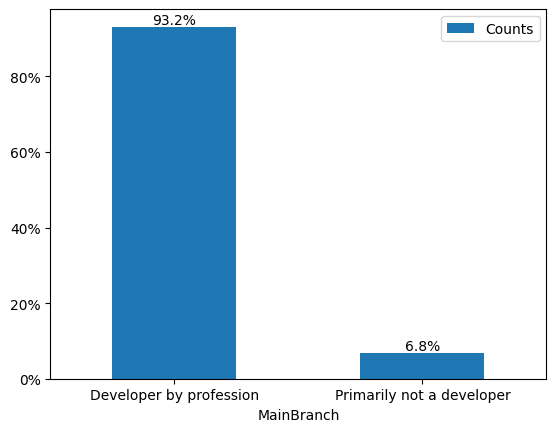

In [7]:

mb['Counts'] = mb['Counts'].apply(lambda x: (x/mb['Counts'].sum())*100)
labels = mb['Counts'].round(1).astype('str') + '%'
ax = mb.plot.bar(x='MainBranch', y='Counts', rot=0)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### How many code as a Hobby?
 

In [8]:
hobby=df['Hobbyist'].value_counts().rename_axis('Hobbyist').reset_index(name='Counts')
hobby

Hobbyist  Counts
0      Yes    7896
1       No    1807

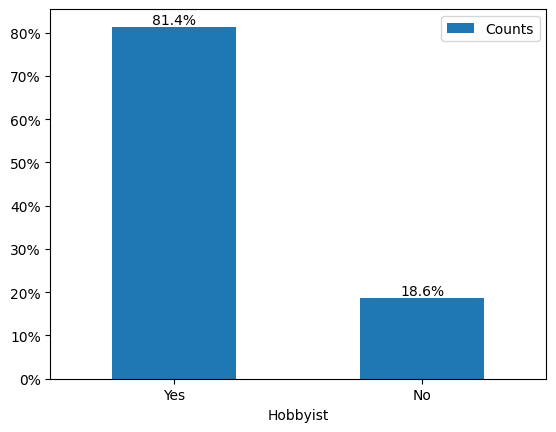

In [9]:
hobby['Counts'] = hobby['Counts'].apply(lambda x: (x/hobby['Counts'].sum())*100)
labels = hobby['Counts'].round(1).astype('str') + '%'
ax = hobby.plot.bar(x='Hobbyist', y='Counts', rot=0)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### Which Languages do they worked with ?
 

In [10]:
lang=df['LanguageWorkedWith']
lang.head()

0                                  C;C++;C#;Python;SQL
1    Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...
2    Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...
3    Bash/Shell/PowerShell;HTML/CSS;JavaScript;Type...
4           C#;HTML/CSS;Java;JavaScript;SQL;TypeScript
Name: LanguageWorkedWith, dtype: object

In [11]:
d=lang.str.split(';',expand=True)
d.columns=["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s"]
d.head()

a         b           c           d       e  \
0                      C       C++          C#      Python     SQL   
1  Bash/Shell/PowerShell        C#    HTML/CSS  JavaScript  Python   
2  Bash/Shell/PowerShell  HTML/CSS  JavaScript         PHP     SQL   
3  Bash/Shell/PowerShell  HTML/CSS  JavaScript  TypeScript    None   
4                     C#  HTML/CSS        Java  JavaScript     SQL   

            f     g     h           i            j          k     l     m  \
0        None  None  None        None         None       None  None  None   
1        Ruby  Rust   SQL  TypeScript  WebAssembly  Other(s):  None  None   
2  TypeScript  None  None        None         None       None  None  None   
3        None  None  None        None         None       None  None  None   
4  TypeScript  None  None        None         None       None  None  None   

      n     o     p     q     r     s  
0  None  None  None  None  None  None  
1  None  None  None  None  None  None  
2  None  None  None  None  None  None  
3  None  None  None  None  None  None  
4  None  None  None  None  None  None

In [12]:
a=d[['a']]
b=d[['b']]
c=d[['c']]
dc=d[['d']]
e=d['e']
f=d[['f']]
g=d[['g']]
h=d[['h']]
i=d[['i']]
j=d[['j']]
k=d[['k']]
l=d[['l']]
m=d[['m']]
n=d[['n']]
o=d[['o']]
p=d[['p']]
q=d[['q']]
r=d[['r']]
s=d[['s']]

In [13]:
b.columns=["a"]
c.columns=["a"]
dc.columns=["a"]
e.columns=["a"]
f.columns=["a"]
g.columns=["a"]
h.columns=["a"]
i.columns=["a"]
j.columns=["a"]
k.columns=["a"]
l.columns=["a"]
m.columns=["a"]
n.columns=["a"]
o.columns=["a"]
p.columns=["a"]
q.columns=["a"]
r.columns=["a"]
s.columns=["a"]

In [14]:
asd=pd.concat([a,b,c,dc,e,f,g,h,i,j],ignore_index=True)
asd=asd['a'].value_counts().rename_axis('Language').reset_index(name='Counts')
asd.head()


Language  Counts
0             JavaScript    6614
1               HTML/CSS    6402
2                    SQL    4497
3  Bash/Shell/PowerShell    3969
4                     C#    3537

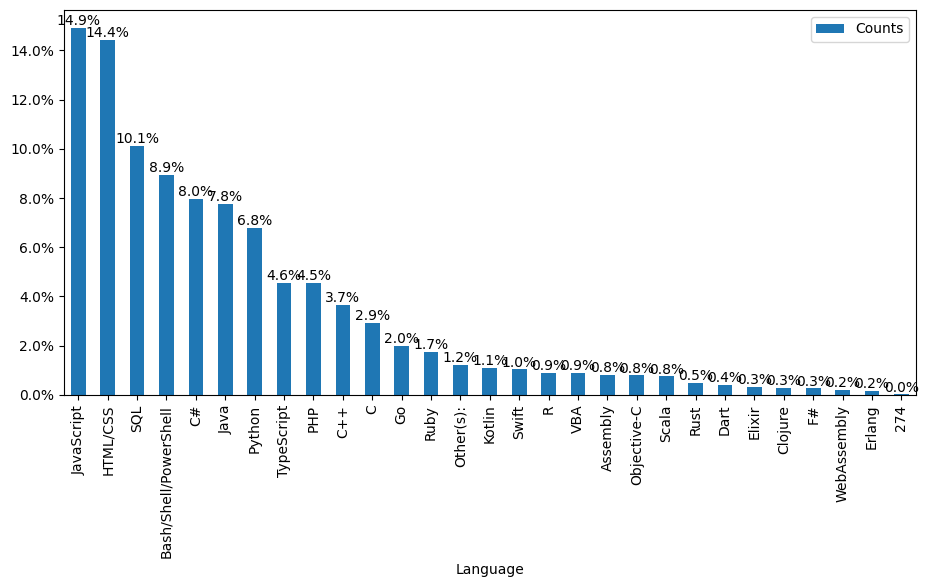

In [15]:
asd['Counts'] = asd['Counts'].apply(lambda x: (x/asd['Counts'].sum())*100)
labels = asd['Counts'].round(1).astype('str') + '%'
ax = asd.plot.bar(x='Language', y='Counts',figsize=(11,5), rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### Which databases do they worked with ?
 

In [16]:
datab=df['DatabaseWorkedWith']
datab.head()

0                                         MySQL;SQLite
1                           DynamoDB;PostgreSQL;SQLite
2                    Couchbase;DynamoDB;Firebase;MySQL
3                                   MongoDB;PostgreSQL
4    DynamoDB;Firebase;Microsoft SQL Server;MySQL;S...
Name: DatabaseWorkedWith, dtype: object

In [17]:
d=datab.str.split(';',expand=True)
d.columns=["a","b","c","d","e","f","g","h","i","j","k","l"]
d.head()

a           b                     c      d       e     f     g  \
0      MySQL      SQLite                  None   None    None  None  None   
1   DynamoDB  PostgreSQL                SQLite   None    None  None  None   
2  Couchbase    DynamoDB              Firebase  MySQL    None  None  None   
3    MongoDB  PostgreSQL                  None   None    None  None  None   
4   DynamoDB    Firebase  Microsoft SQL Server  MySQL  SQLite  None  None   

      h     i     j     k     l  
0  None  None  None  None  None  
1  None  None  None  None  None  
2  None  None  None  None  None  
3  None  None  None  None  None  
4  None  None  None  None  None

In [18]:
a=d[['a']]
b=d[['b']]
c=d[['c']]
dc=d[['d']]
e=d['e']
f=d[['f']]
g=d[['g']]
h=d[['h']]
i=d[['i']]
j=d[['j']]
k=d[['k']]
l=d[['l']]


In [19]:
b.columns=["a"]
c.columns=["a"]
dc.columns=["a"]
e.columns=["a"]
f.columns=["a"]
g.columns=["a"]
h.columns=["a"]
i.columns=["a"]
j.columns=["a"]
k.columns=["a"]
l.columns=["a"]

In [20]:
asd=pd.concat([a,b,c,dc,e,f,g,h,i,j],ignore_index=True)
asd=asd['a'].value_counts().rename_axis('Database').reset_index(name='Counts')
asd.head()


Database  Counts
0                 MySQL    4447
1  Microsoft SQL Server    3423
2            PostgreSQL    3199
3               MongoDB    2518
4                SQLite    2358

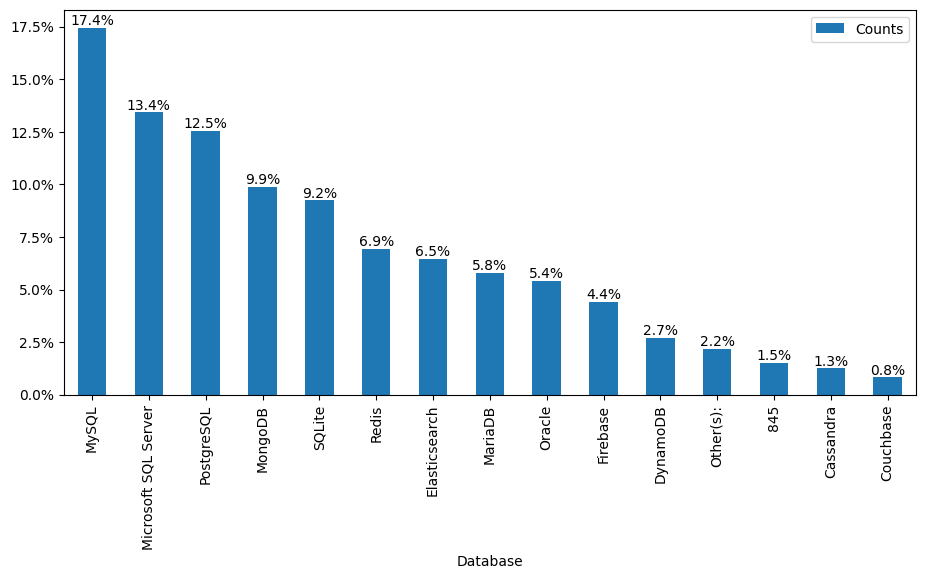

In [21]:
asd['Counts'] = asd['Counts'].apply(lambda x: (x/asd['Counts'].sum())*100)
labels = asd['Counts'].round(1).astype('str') + '%'
ax = asd.plot.bar(x='Database', y='Counts',figsize=(11,5), rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### Language desire next year?
 

In [22]:
langd=df['LanguageDesireNextYear']
datab.head()

0                                         MySQL;SQLite
1                           DynamoDB;PostgreSQL;SQLite
2                    Couchbase;DynamoDB;Firebase;MySQL
3                                   MongoDB;PostgreSQL
4    DynamoDB;Firebase;Microsoft SQL Server;MySQL;S...
Name: DatabaseWorkedWith, dtype: object

In [23]:
d=langd.str.split(';',expand=True)
d.columns=["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
d.head()

a           b           c           d           e  \
0                      C          C#  JavaScript         SQL        None   
1  Bash/Shell/PowerShell           C    HTML/CSS  JavaScript        Ruby   
2  Bash/Shell/PowerShell    HTML/CSS  JavaScript        Rust         SQL   
3  Bash/Shell/PowerShell    HTML/CSS        Java  JavaScript  TypeScript   
4               HTML/CSS  JavaScript        None        None        None   

             f            g           h            i          j  ...     q  \
0         None         None        None         None       None  ...  None   
1         Rust          SQL  TypeScript  WebAssembly  Other(s):  ...  None   
2   TypeScript  WebAssembly        None         None       None  ...  None   
3  WebAssembly         None        None         None       None  ...  None   
4         None         None        None         None       None  ...  None   

      r     s     t     u     v     w     x     y     z  
0  None  None  None  None  None  None  None  None  None  
1  None  None  None  None  None  None  None  None  None  
2  None  None  None  None  None  None  None  None  None  
3  None  None  None  None  None  None  None  None  None  
4  None  None  None  None  None  None  None  None  None  

[5 rows x 26 columns]

In [24]:
a=d[['a']]
b=d[['b']]
c=d[['c']]
dc=d[['d']]
e=d['e']
f=d[['f']]
g=d[['g']]
h=d[['h']]
i=d[['i']]
j=d[['j']]
k=d[['k']]
l=d[['l']]
m=d[['m']]
n=d[['n']]
o=d[['o']]
p=d[['p']]
q=d[['q']]
r=d[['r']]
s=d[['s']]

In [25]:
b.columns=["a"]
c.columns=["a"]
dc.columns=["a"]
e.columns=["a"]
f.columns=["a"]
g.columns=["a"]
h.columns=["a"]
i.columns=["a"]
j.columns=["a"]
k.columns=["a"]
l.columns=["a"]
m.columns=["a"]
n.columns=["a"]
o.columns=["a"]
p.columns=["a"]
q.columns=["a"]
r.columns=["a"]
s.columns=["a"]

In [26]:
asd=pd.concat([a,b,c,dc,e,f,g,h,i,j],ignore_index=True)
asd=asd['a'].value_counts().rename_axis('Language').reset_index(name='Counts')
asd.head()


Language  Counts
0  JavaScript    5090
1    HTML/CSS    4357
2      Python    3633
3         SQL    3201
4          C#    3022

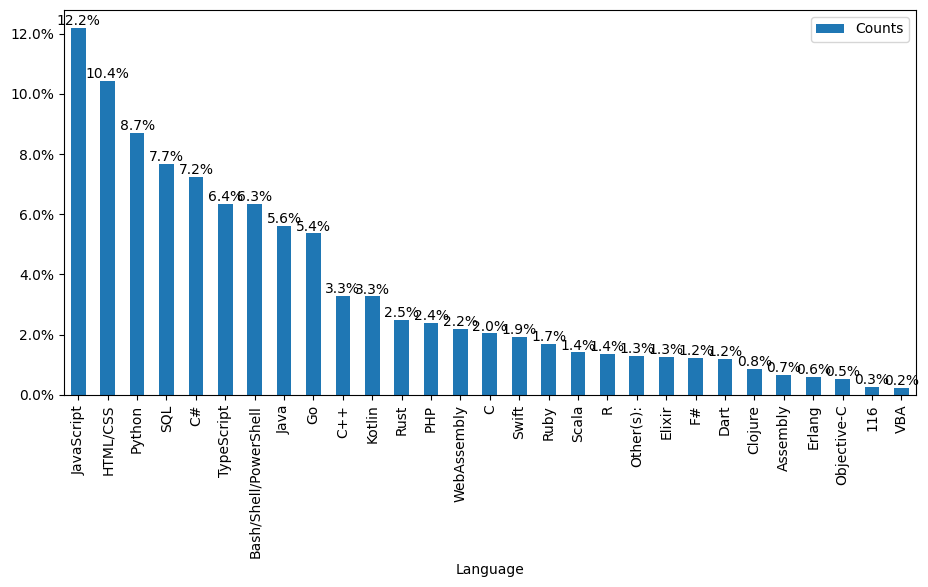

In [27]:
asd['Counts'] = asd['Counts'].apply(lambda x: (x/asd['Counts'].sum())*100)
labels = asd['Counts'].round(1).astype('str') + '%'
ax = asd.plot.bar(x='Language', y='Counts',figsize=(11,5), rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### Database desire next year?
 

In [28]:
datab=df['DatabaseDesireNextYear']
datab.head()

0                                 MySQL;SQLite
1                      PostgreSQL;Redis;SQLite
2                         Firebase;MySQL;Redis
3    Elasticsearch;Firebase;MongoDB;PostgreSQL
4                                     DynamoDB
Name: DatabaseDesireNextYear, dtype: object

In [29]:
d=datab.str.split(';',expand=True)
d.columns=["a","b","c","d","e","f","g","h","i","j","k","l","m"]
d.head()

a         b        c           d     e     f     g     h     i  \
0          MySQL    SQLite     None        None  None  None  None  None  None   
1     PostgreSQL     Redis   SQLite        None  None  None  None  None  None   
2       Firebase     MySQL    Redis        None  None  None  None  None  None   
3  Elasticsearch  Firebase  MongoDB  PostgreSQL  None  None  None  None  None   
4       DynamoDB      None     None        None  None  None  None  None  None   

      j     k     l     m  
0  None  None  None  None  
1  None  None  None  None  
2  None  None  None  None  
3  None  None  None  None  
4  None  None  None  None

In [30]:
a=d[['a']]
b=d[['b']]
c=d[['c']]
dc=d[['d']]
e=d['e']
f=d[['f']]
g=d[['g']]
h=d[['h']]
i=d[['i']]
j=d[['j']]


In [31]:
b.columns=["a"]
c.columns=["a"]
dc.columns=["a"]
e.columns=["a"]
f.columns=["a"]
g.columns=["a"]
h.columns=["a"]
i.columns=["a"]
j.columns=["a"]

In [32]:
asd=pd.concat([a,b,c,dc,e,f,g,h,i,j],ignore_index=True)
asd=asd['a'].value_counts().rename_axis('Database').reset_index(name='Counts')
asd.head()


Database  Counts
0     PostgreSQL    3786
1        MongoDB    3300
2          MySQL    2896
3          Redis    2700
4  Elasticsearch    2642

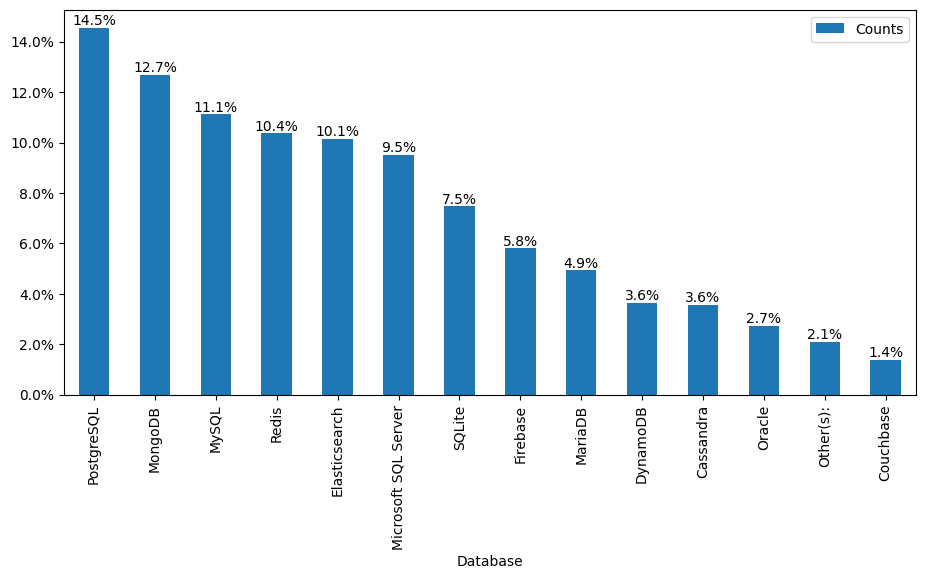

In [33]:
asd['Counts'] = asd['Counts'].apply(lambda x: (x/asd['Counts'].sum())*100)
labels = asd['Counts'].round(1).astype('str') + '%'
ax = asd.plot.bar(x='Database', y='Counts',figsize=(11,5), rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

 ### How frequently do they contribute to Open Source?
  

In [34]:
op=df['OpenSourcer'].value_counts().rename_axis('OpenSourcer').reset_index(name='Counts')
op

OpenSourcer  Counts
0                                              Never    3120
1                            Less than once per year    3015
2  Less than once a month but more than once per ...    2509
3                         Once a month or more often    1059

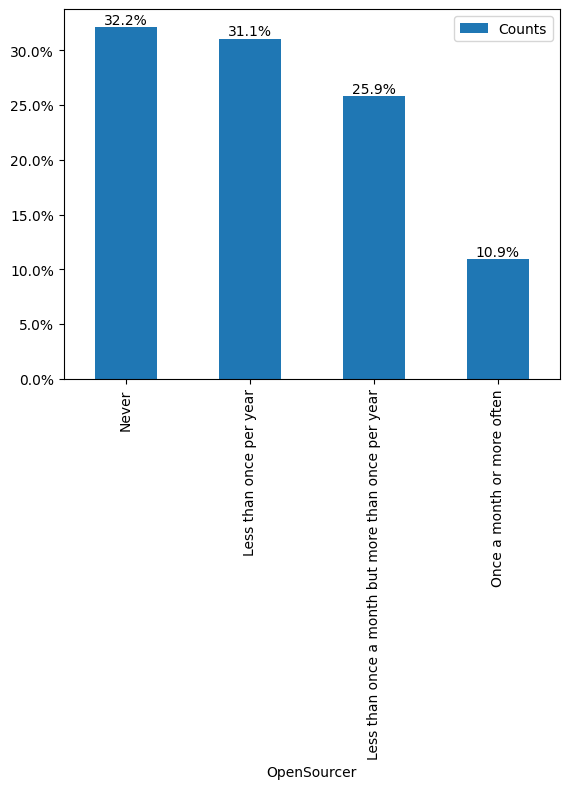

In [35]:
op['Counts'] = op['Counts'].apply(lambda x: (x/op['Counts'].sum())*100)
labels = op['Counts'].round(1).astype('str') + '%'
ax = op.plot.bar(x='OpenSourcer', y='Counts', rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### Employment type
 

In [36]:
emp=df['Employment'].value_counts().rename_axis('Employment').reset_index(name='Counts')
emp

Employment  Counts
0  Employed full-time    9326
1  Employed part-time     377

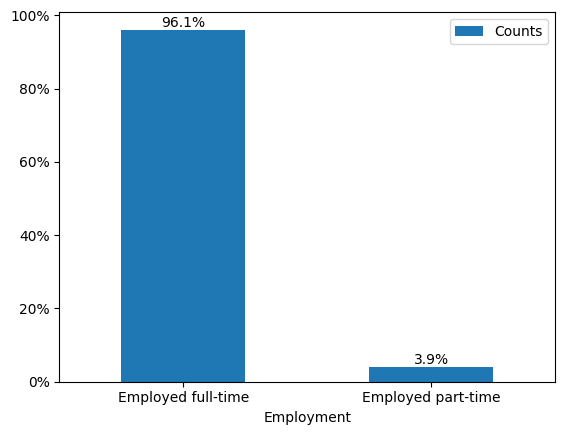

In [37]:
emp['Counts'] = emp['Counts'].apply(lambda x: (x/emp['Counts'].sum())*100)
labels = emp['Counts'].round(1).astype('str') + '%'
ax = emp.plot.bar(x='Employment', y='Counts', rot=0)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### Which country do they reside?
 

In [38]:
C= df['Country'].value_counts().rename_axis('Country').reset_index(name='Counts')
Country=C.head(15)
Country.head()

Country  Counts
0   United States    2598
1           India     714
2  United Kingdom     657
3         Germany     622
4          Canada     360

C:\Users\neera\AppData\Local\Temp\ipykernel_22332\520509403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Country['Counts'] = Country['Counts'].apply(lambda x: (x/Country['Counts'].sum())*100)


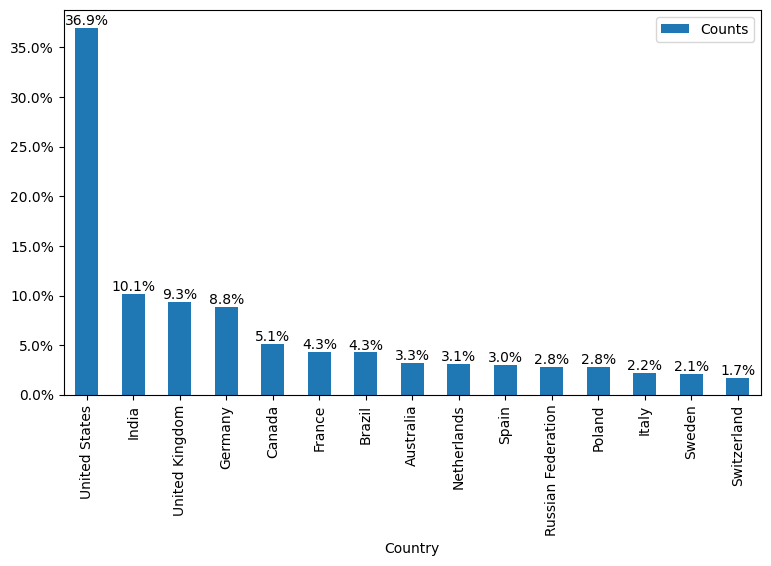

In [39]:
Country['Counts'] = Country['Counts'].apply(lambda x: (x/Country['Counts'].sum())*100)
labels = Country['Counts'].round(1).astype('str') + '%'
ax = Country.plot.bar(x='Country', y='Counts',figsize = (9,5), rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### How many are students?
 

In [40]:
Student = df['Student'].value_counts().rename_axis('Student').reset_index(name='Counts')
Student=Student.head(3)
Student

Student  Counts
0              No    8234
1  Yes, full-time     838
2  Yes, part-time     591

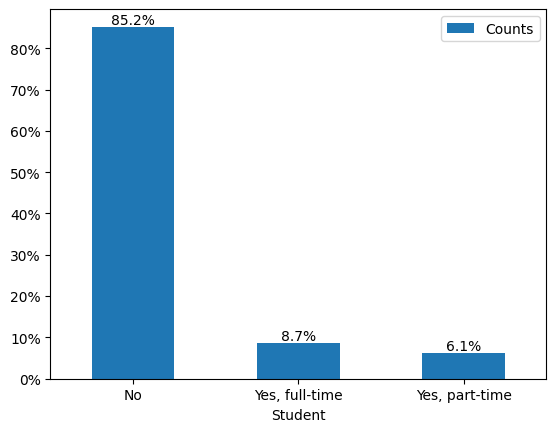

In [41]:
Student['Counts'] = Student['Counts'].apply(lambda x: (x/Student['Counts'].sum())*100)
labels = Student['Counts'].round(1).astype('str') + '%'
ax = Student.plot.bar(x='Student', y='Counts', rot=0)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### Education Level
 

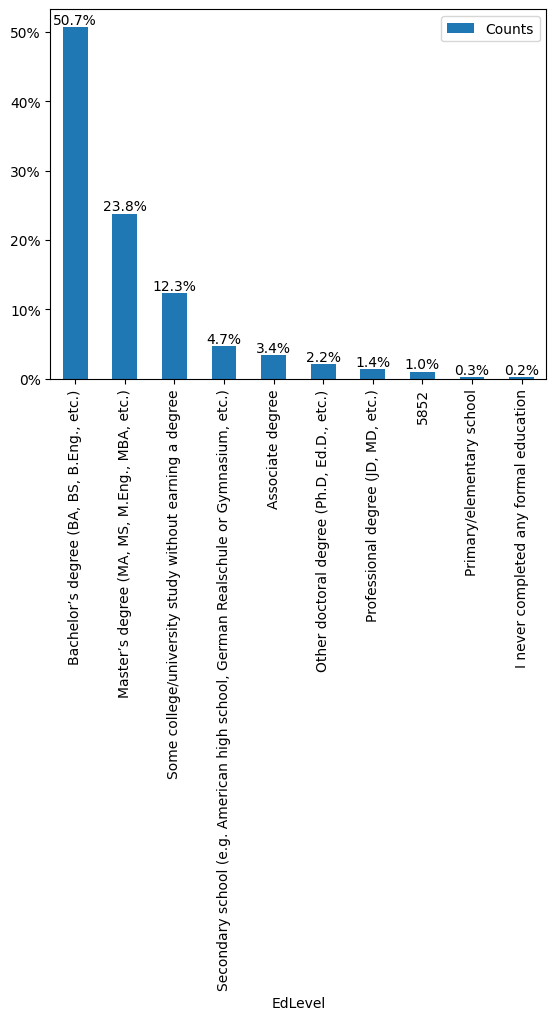

In [42]:
mb = df['EdLevel'].value_counts().rename_axis('EdLevel').reset_index(name='Counts')


mb['Counts'] = mb['Counts'].apply(lambda x: (x/mb['Counts'].sum())*100)
labels = mb['Counts'].round(1).astype('str') + '%'
ax = mb.plot.bar(x='EdLevel', y='Counts', rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### Undergrad Major
 

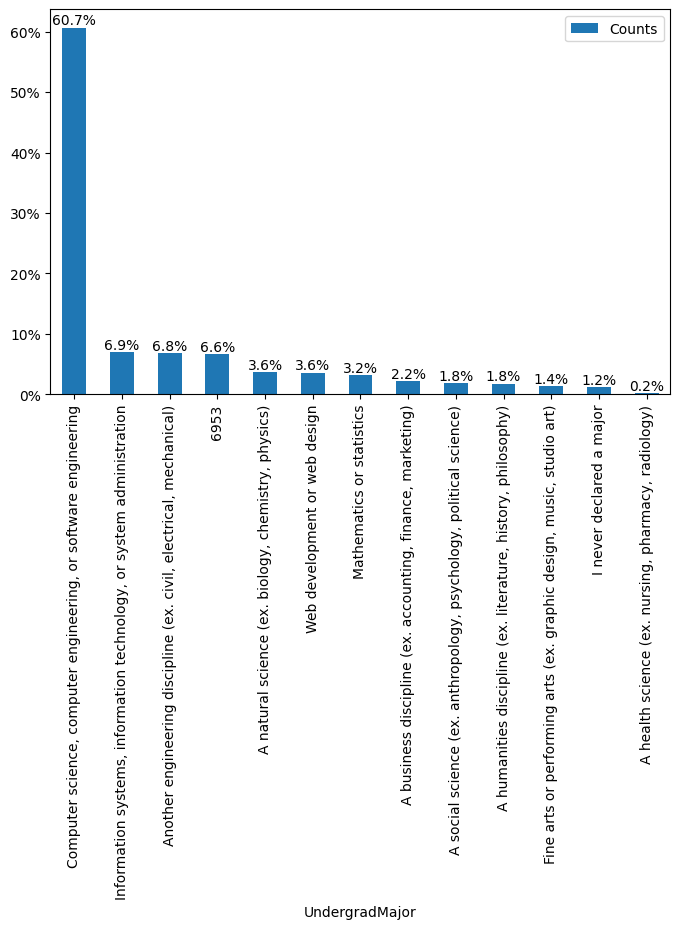

In [43]:
mb = df['UndergradMajor'].value_counts().rename_axis('UndergradMajor').reset_index(name='Counts')


mb['Counts'] = mb['Counts'].apply(lambda x: (x/mb['Counts'].sum())*100)
labels = mb['Counts'].round(1).astype('str') + '%'
ax = mb.plot.bar(x='UndergradMajor', y='Counts',figsize = (8,5), rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### Development Type
 

In [44]:
mb = df['DevType'].value_counts().rename_axis('DevType').reset_index(name='Counts')
mb=mb.head(15)

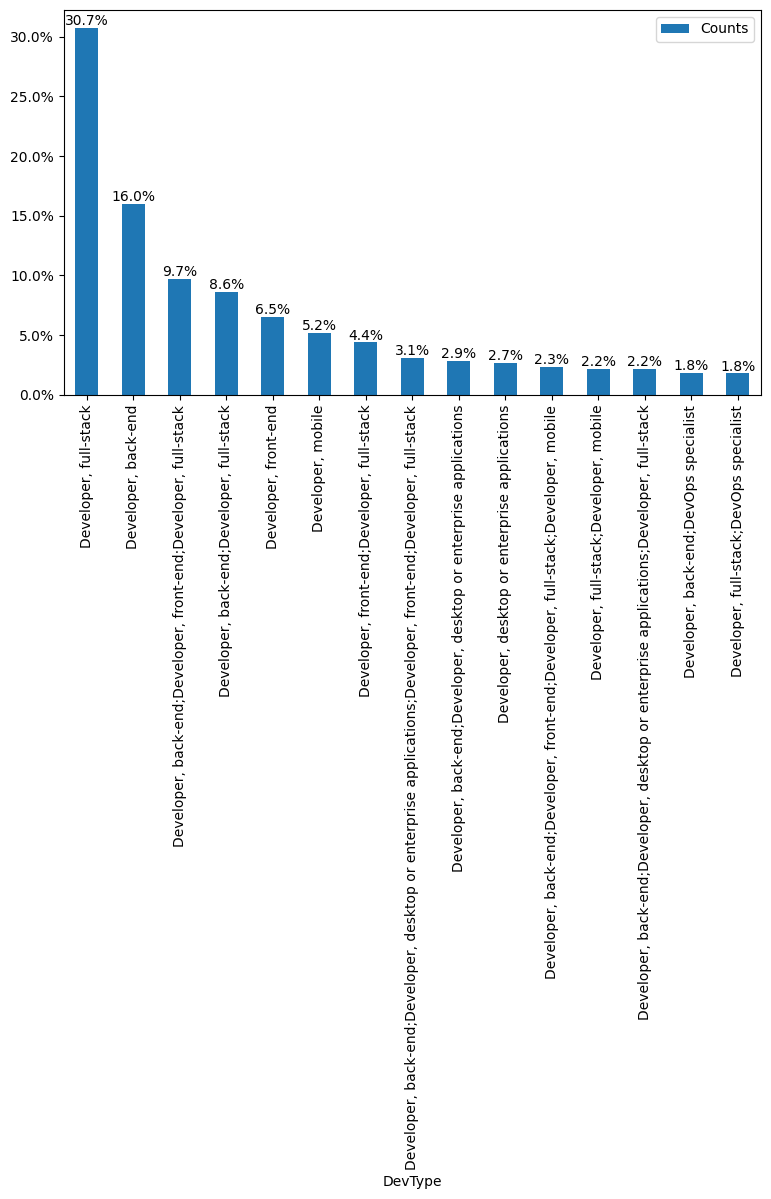

In [45]:
mb['Counts'] = mb['Counts'].apply(lambda x: (x/mb['Counts'].sum())*100)
labels = mb['Counts'].round(1).astype('str') + '%'
ax = mb.plot.bar(x='DevType', y='Counts', figsize = (9,5), rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())




### How many are satisfied with their career?
 

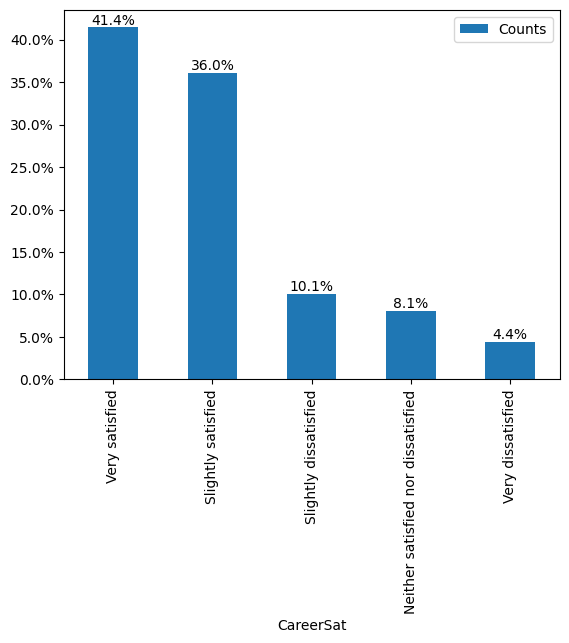

In [46]:
mb = df['CareerSat'].value_counts().rename_axis('CareerSat').reset_index(name='Counts')
mb


mb['Counts'] = mb['Counts'].apply(lambda x: (x/mb['Counts'].sum())*100)
labels = mb['Counts'].round(1).astype('str') + '%'
ax = mb.plot.bar(x='CareerSat', y='Counts', rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### How many are satisfied with their job?
 

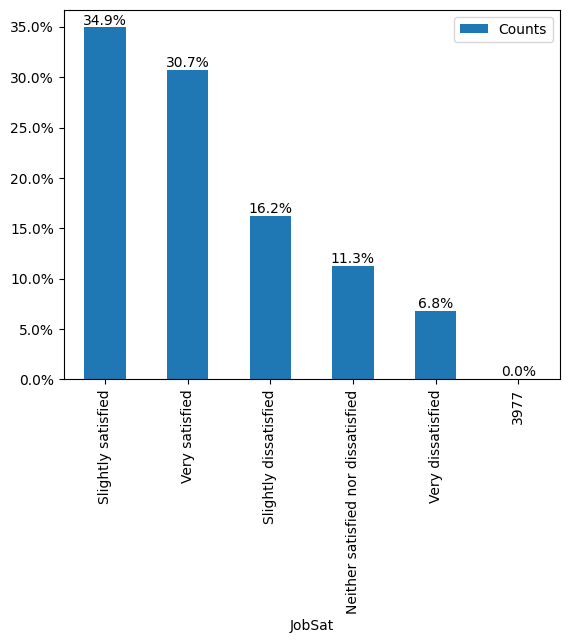

In [47]:
mb = df['JobSat'].value_counts().rename_axis('JobSat').reset_index(name='Counts')
mb


mb['Counts'] = mb['Counts'].apply(lambda x: (x/mb['Counts'].sum())*100)
labels = mb['Counts'].round(1).astype('str') + '%'
ax = mb.plot.bar(x='JobSat', y='Counts', rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### How many want to be a manager?
 

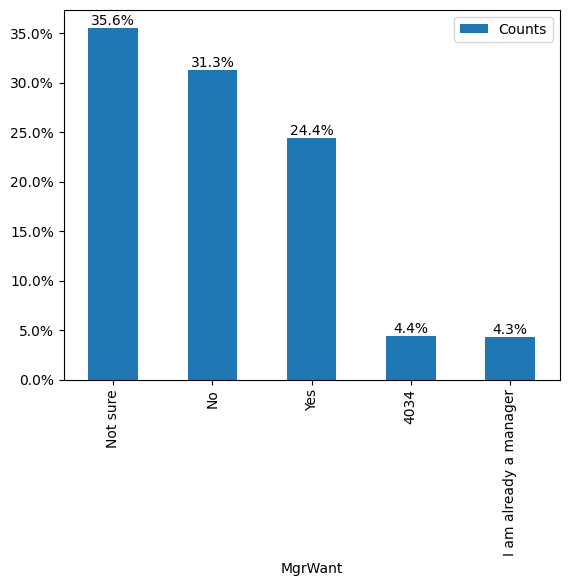

In [48]:

mb = df['MgrWant'].value_counts().rename_axis('MgrWant').reset_index(name='Counts')
mb


mb['Counts'] = mb['Counts'].apply(lambda x: (x/mb['Counts'].sum())*100)
labels = mb['Counts'].round(1).astype('str') + '%'
ax = mb.plot.bar(x='MgrWant', y='Counts', rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### Job Seeking Status
 

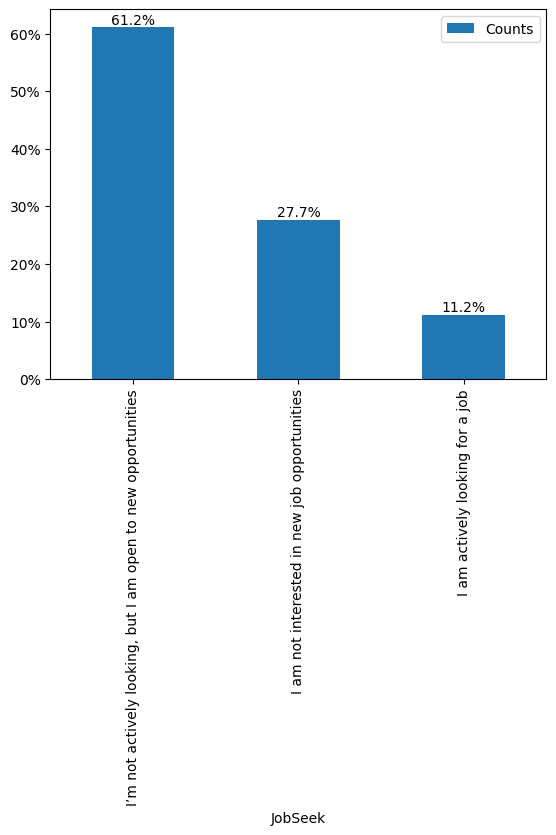

In [49]:
mb = df['JobSeek'].value_counts().rename_axis('JobSeek').reset_index(name='Counts')
mb


mb['Counts'] = mb['Counts'].apply(lambda x: (x/mb['Counts'].sum())*100)
labels = mb['Counts'].round(1).astype('str') + '%'
ax = mb.plot.bar(x='JobSeek', y='Counts', rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### On Average, how many hours do they work?
 

In [50]:
mb = df['WorkWeekHrs'].value_counts().rename_axis('WorkWeekHrs').reset_index(name='Counts')
mb

WorkWeekHrs  Counts
0           40.0    4847
1           45.0     959
2           50.0     580
3           35.0     506
4           42.0     256
..           ...     ...
107        355.0       1
108         36.2       1
109         13.0       1
110         31.5       1
111         61.0       1

[112 rows x 2 columns]

In [51]:
mb.loc[mb['Counts'] < 200, ['WorkWeekHrs']] = 'Others'
mb

WorkWeekHrs  Counts
0          40.0    4847
1          45.0     959
2          50.0     580
3          35.0     506
4          42.0     256
..          ...     ...
107      Others       1
108      Others       1
109      Others       1
110      Others       1
111      Others       1

[112 rows x 2 columns]

In [52]:

import plotly
import plotly.express as px
fig = px.pie(mb, values='Counts', names='WorkWeekHrs', title='No. of hours they work per week')
fig.show()

### How often do they work remotely?
 

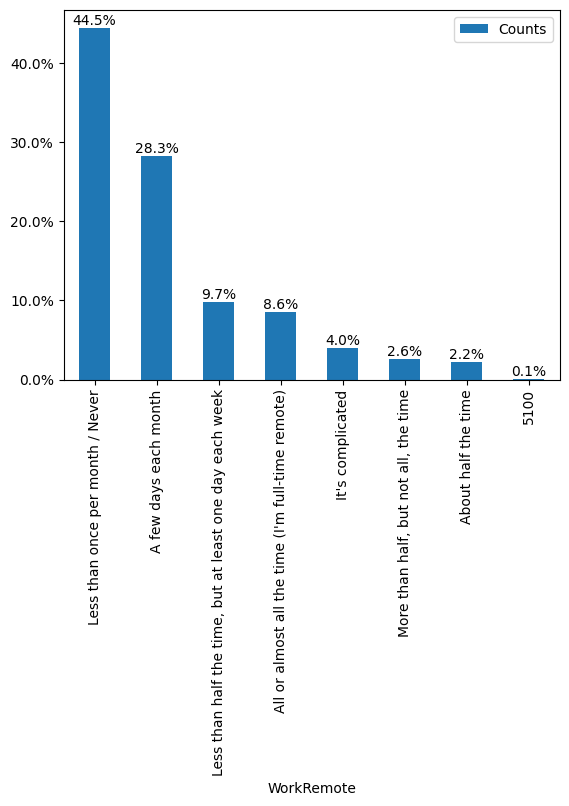

In [53]:
mb = df['WorkRemote'].value_counts().rename_axis('WorkRemote').reset_index(name='Counts')
mb


mb['Counts'] = mb['Counts'].apply(lambda x: (x/mb['Counts'].sum())*100)
labels = mb['Counts'].round(1).astype('str') + '%'
ax = mb.plot.bar(x='WorkRemote', y='Counts', rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### Gender
 

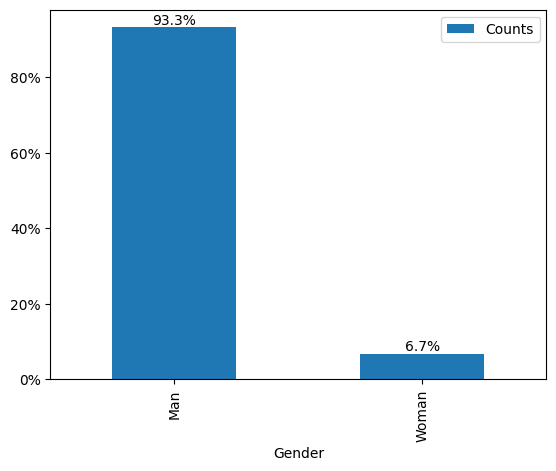

In [54]:
mb = df['Gender'].value_counts().rename_axis('Gender').reset_index(name='Counts')
mb=mb.head(2)


mb['Counts'] = mb['Counts'].apply(lambda x: (x/mb['Counts'].sum())*100)
labels = mb['Counts'].round(1).astype('str') + '%'
ax = mb.plot.bar(x='Gender', y='Counts', rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### Age of the responders
 

In [55]:
mb = df['Age'].to_frame()
mb

Age
0     22.0
1     23.0
2     28.0
3     29.0
4     31.0
...    ...
9698  32.0
9699  36.0
9700  25.0
9701  34.0
9702  25.0

[9703 rows x 1 columns]

In [56]:
labels = ['1-9','10-19','20-29','30-39','40-49']
bins = np.linspace(1, 50, 6)
mb['Age-group'] = pd.cut(mb['Age'], bins, include_lowest=True, labels=labels )
mb

Age Age-group
0     22.0     20-29
1     23.0     20-29
2     28.0     20-29
3     29.0     20-29
4     31.0     30-39
...    ...       ...
9698  32.0     30-39
9699  36.0     30-39
9700  25.0     20-29
9701  34.0     30-39
9702  25.0     20-29

[9703 rows x 2 columns]

In [57]:
mb=mb['Age-group'].to_frame().value_counts().rename_axis('Age-group').reset_index(name='Counts')

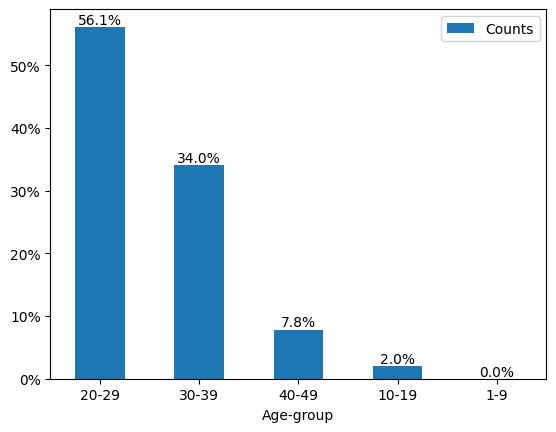

In [58]:
mb['Counts'] = mb['Counts'].apply(lambda x: (x/mb['Counts'].sum())*100)
labels = mb['Counts'].round(1).astype('str') + '%'
ax = mb.plot.bar(x='Age-group', y='Counts', rot=0)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### Which social media do they use the most?
 

C:\Users\neera\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 24494 (\N{CJK UNIFIED IDEOGRAPH-5FAE}) missing from current font.

C:\Users\neera\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from current font.

C:\Users\neera\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from current font.

C:\Users\neera\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 28010 (\N{CJK UNIFIED IDEOGRAPH-6D6A}) missing from current font.

C:\Users\neera\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 21338 (\N{CJK UNIFIED IDEOGRAPH-535A}) missing from current font.

C:\Users\neera\AppData\Local\Programs\Python\Python311\Lib\site-p

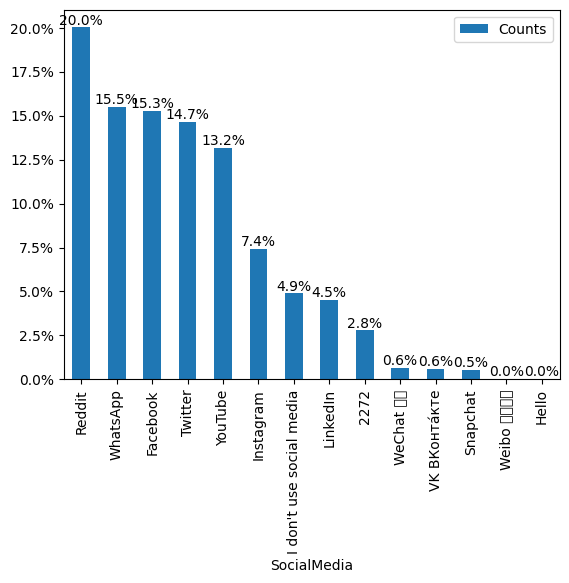

In [59]:
mb = df['SocialMedia'].value_counts().rename_axis('SocialMedia').reset_index(name='Counts')
mb


mb['Counts'] = mb['Counts'].apply(lambda x: (x/mb['Counts'].sum())*100)
labels = mb['Counts'].round(1).astype('str') + '%'
ax = mb.plot.bar(x='SocialMedia', y='Counts', rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### What primary operating system do they use?
 

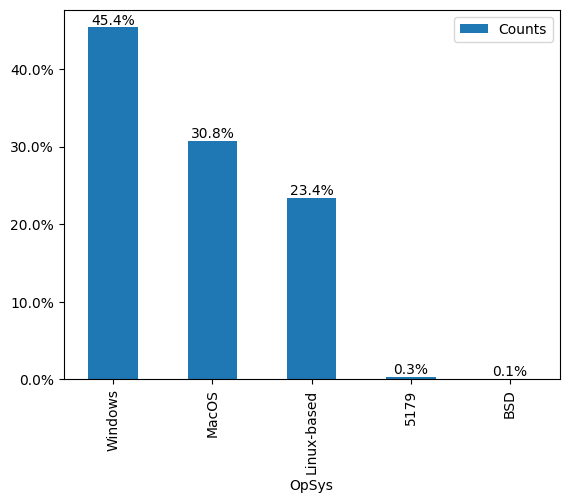

In [60]:
mb = df['OpSys'].value_counts().rename_axis('OpSys').reset_index(name='Counts')
mb


mb['Counts'] = mb['Counts'].apply(lambda x: (x/mb['Counts'].sum())*100)
labels = mb['Counts'].round(1).astype('str') + '%'
ax = mb.plot.bar(x='OpSys', y='Counts', rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### What is the level of competence according to them?
 

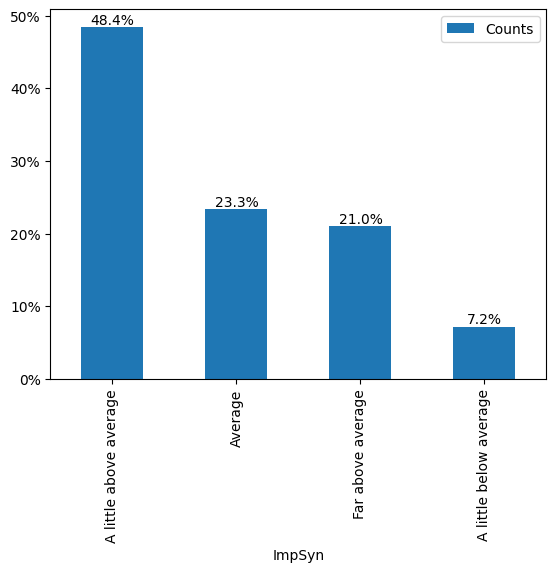

In [61]:

mb = df['ImpSyn'].value_counts().rename_axis('ImpSyn').reset_index(name='Counts')
mb=mb.head(4)


mb['Counts'] = mb['Counts'].apply(lambda x: (x/mb['Counts'].sum())*100)
labels = mb['Counts'].round(1).astype('str') + '%'
ax = mb.plot.bar(x='ImpSyn', y='Counts', rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [62]:
df['WorkLoc'].value_counts()

Office                                            5796
Home                                              3066
Other place, such as a coworking space or cafe     815
6806                                                26
Name: WorkLoc, dtype: int64

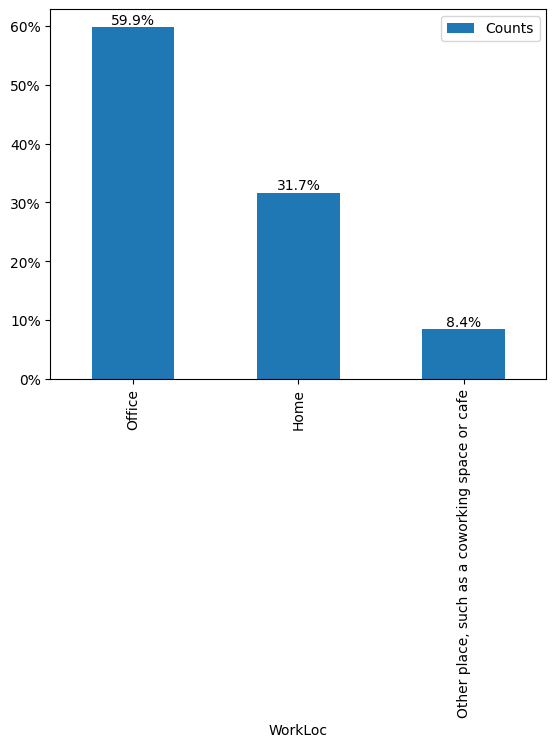

In [63]:
mb = df['WorkLoc'].value_counts().rename_axis('WorkLoc').reset_index(name='Counts')
mb=mb.head(3)


mb['Counts'] = mb['Counts'].apply(lambda x: (x/mb['Counts'].sum())*100)
labels = mb['Counts'].round(1).astype('str') + '%'
ax = mb.plot.bar(x='WorkLoc', y='Counts', rot=90)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### Most Frequently used currencies
 

In [64]:
mb = df['CurrencyDesc'].value_counts().rename_axis('CurrencyDesc').reset_index(name='Counts')
mb

CurrencyDesc  Counts
0   United States dollar    2783
1          European Euro    2116
2           Indian rupee     708
3         Pound sterling     662
4        Canadian dollar     356
..                   ...     ...
92         Turkmen manat       1
93           Yemeni rial       1
94         Rwandan franc       1
95         Brunei dollar       1
96        Sudanese pound       1

[97 rows x 2 columns]

In [65]:

mb.loc[mb['Counts'] < 200, ['CurrencyDesc']] = 'Others'
fig = px.pie(mb, values='Counts', names='CurrencyDesc',)
fig.show()

### Do people think they have a better life than their parents?
 

In [66]:
mb = df['BetterLife'].value_counts().rename_axis('BetterLife').reset_index(name='Counts')
mb=mb.head(2)

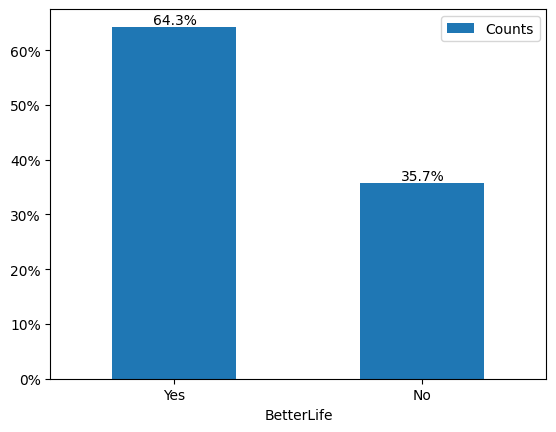

In [67]:
mb['Counts'] = mb['Counts'].apply(lambda x: (x/mb['Counts'].sum())*100)
labels = mb['Counts'].round(1).astype('str') + '%'
ax = mb.plot.bar(x='BetterLife', y='Counts', rot=0)
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### Age at which they wrote their first line of cade?
 

In [68]:
mb = df['Age1stCode'].value_counts().rename_axis('Age1stCode').reset_index(name='Counts')

In [69]:
mb.loc[mb['Counts'] < 500, ['Age1stCode']] = 'Others'
fig = px.pie(mb, values='Counts', names='Age1stCode',)
fig.show()

### Compensation by Age
 

<Axes: xlabel='ConvertedComp', ylabel='Age'>

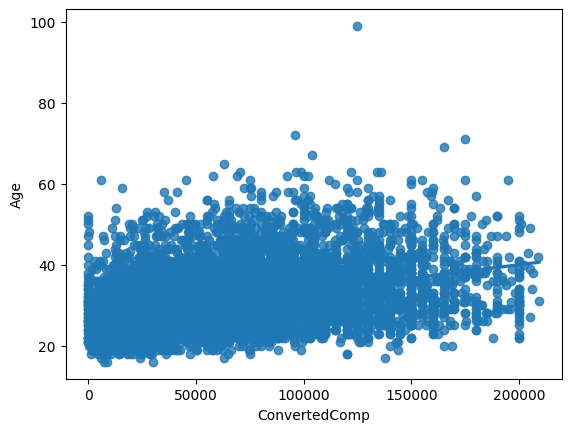

In [70]:
sns.regplot(x="ConvertedComp", y="Age", data=df)

**Insight:** Compensation increases with age.

### Compensation by Education
 

In [71]:
bar_data = df.groupby(['EdLevel'])['ConvertedComp'].mean().reset_index()
fig = px.bar(bar_data, x="EdLevel", y="ConvertedComp")
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

**Insight:**
    Doctoral degree have highest average comprensation. We can infer that higher education level is directly propotional to compensation.

### Compensation  by Student
 

In [72]:
bar_data = df.groupby(['Student'])['ConvertedComp'].mean().reset_index()
fig = px.bar(bar_data, x="Student", y="ConvertedComp")
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

**Insight:** This was as expected.

### Compensation by Undergrad Major
 

In [73]:
bar_data = df.groupby(['UndergradMajor'])['ConvertedComp'].mean().reset_index()
fig = px.bar(bar_data, x="UndergradMajor", y="ConvertedComp")
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

### Career satisfaction by Compensation
 

In [74]:
bar_data = df.groupby(['CareerSat'])['ConvertedComp'].mean().reset_index()
fig = px.bar(bar_data, x="CareerSat", y="ConvertedComp")
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

**Insight:** Career satisfaction increases with increase in compensation.

### Compensation by Currency type
 

In [75]:
bar_data = df.groupby(['CurrencyDesc'])['ConvertedComp'].mean().reset_index()
fig = px.bar(bar_data, x="CurrencyDesc", y="ConvertedComp")
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

### Compensation by Country
 

In [76]:
bar_data = df.groupby(['Country'])['ConvertedComp'].mean().reset_index()
fig = px.bar(bar_data, x="Country", y="ConvertedComp")
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

### Compensation by OrgSize
 

In [77]:
bar_data = df.groupby(['OrgSize'])['ConvertedComp'].mean().reset_index()
fig = px.bar(bar_data, x="OrgSize", y="ConvertedComp")
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

**Insight:** The bigger the organisation size, the better is the compensation.

## Compensation by Assumed competence level
 

In [78]:
bar_data = df.groupby(['ImpSyn'])['ConvertedComp'].mean().reset_index()
fig = px.bar(bar_data, x="ImpSyn", y="ConvertedComp")
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

**Insight:** A person confident in his competence level has better compensation.

### OS by Compensation
 

In [79]:
bar_data = df.groupby(['OpSys'])['ConvertedComp'].mean().reset_index()
fig = px.bar(bar_data, x="OpSys", y="ConvertedComp")
fig.update_layout(xaxis = {"categoryorder":"total descending"})
fig.show()

# Conclusion:
 

#### Here are a few of the top takeaways from this survey analysis:

* JavaScript is the most widely used language.
* MySQL is the most widely used databse.
* Python is the highest grossing major programming language.
* People wish to learn PostgresSQL and Java in the comming year.
* Almost 68% contribute to Open Source.
* 96% of the respondents are full time employed.
* The United States have maximum number of developers (37%).
* 50% of the respondents have only Bachelor's degree.
* Majority of them are full stack developers.
* Large part of developer community is satisfied with their career and job.
* Surprisingly very few developers are actively looking for a job.
* Almost half of the developers work 40 hours a week.
* Most of the developers eithet work less than a month remotely or never.
* Whooping 93% are male developers.
* Most of the developers are in the range of 20-29 years.
* Reddit is most famous social media among developers.
* Most of the developers are confident in their competence level.
* Almost 60% work from office.
* Majority wrote their fir code by 15 years of age.
* Compensation increases with age.
* Having a doctoral gives higher average compensation.
* Web Designer and Web Developer's Major are least paid.
* Career satisfaction increases with increase in compensation.
* Developers of The United States are among highest paid developers.
* Bigger organisation provide better salary.
* A person confident in his competence level has better compensation.